In [1]:
import psycopg2
from psycopg2.extensions import connection

In [2]:
from dotenv import load_dotenv
import os
load_dotenv()

DB_NAME = os.getenv("DB_NAME")
DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")

In [3]:
conn = psycopg2.connect(f"dbname={DB_NAME} user={DB_USER} password={DB_PASSWORD} host=localhost")

In [4]:
table = "social_network"
cur = conn.cursor()
cur.execute(f"SELECT * FROM {table}")
raw_data = cur.fetchall()
column_names = [desc[0] for desc in cur.description]
cur.close()

In [5]:
# Create a dataframe

import pandas as pd
df = pd.DataFrame(raw_data, columns=column_names)
df.head()

,id,compose_post_service_cpu,compose_post_service_memory,compose_post_service_replicas,home_timeline_redis_cpu,home_timeline_redis_memory,home_timeline_redis_replicas,home_timeline_service_cpu,home_timeline_service_memory,home_timeline_service_replicas,...,user_timeline_mongodb_cpu,user_timeline_mongodb_memory,user_timeline_mongodb_replicas,user_timeline_redis_cpu,user_timeline_redis_memory,user_timeline_redis_replicas,user_timeline_service_cpu,user_timeline_service_memory,user_timeline_service_replicas,timestamp
0,1,0.00285,0.976562,1,0.92095,2.675781,1,0.00110,1.003906,1,...,5.09875,58.152344,1,0.58515,2.4375,1,0.02985,1.539062,1,1720854991
1,2,0.00150,0.976562,1,1.23165,2.425781,1,0.00370,1.003906,1,...,1.95085,58.152344,1,0.43730,2.4375,1,0.01960,1.539062,1,1720855001
2,3,0.00120,0.976562,1,2.31425,2.425781,1,0.00395,1.003906,1,...,3.53385,58.152344,1,1.13110,2.4375,1,0.01150,1.539062,1,1720855011
3,4,0.00120,0.976562,1,1.08260,2.425781,1,0.00135,1.003906,1,...,6.70350,58.152344,1,0.69380,2.4375,1,0.03125,1.539062,1,1720855021
4,5,0.00270,0.976562,1,0.89695,2.425781,1,0.00110,1.003906,1,...,5.40220,58.406250,1,0.66120,2.4375,1,0.03115,1.539062,1,1720855031


In [6]:
table = "social_network_predicted"
cur = conn.cursor()
cur.execute(f"SELECT * FROM {table}")
raw_predicted_data = cur.fetchall()
column_names = [desc[0] for desc in cur.description]
cur.close()

In [7]:
# Create a dataframe

import pandas as pd
df_predicted = pd.DataFrame(raw_predicted_data, columns=column_names)
df_predicted.head()

,id,compose_post_service_cpu,compose_post_service_memory,compose_post_service_replicas,home_timeline_redis_cpu,home_timeline_redis_memory,home_timeline_redis_replicas,home_timeline_service_cpu,home_timeline_service_memory,home_timeline_service_replicas,...,user_timeline_mongodb_cpu,user_timeline_mongodb_memory,user_timeline_mongodb_replicas,user_timeline_redis_cpu,user_timeline_redis_memory,user_timeline_redis_replicas,user_timeline_service_cpu,user_timeline_service_memory,user_timeline_service_replicas,timestamp
0,1,9.248644,0.0,0,21.288890,0.0,0,2.727607,0.0,0,...,4.108476,0.0,0,14.329045,0.0,0,15.497735,0.0,0,1720858199
1,2,9.248644,0.0,0,21.288890,0.0,0,2.727607,0.0,0,...,4.108476,0.0,0,14.329045,0.0,0,15.497735,0.0,0,1720858209
2,3,7.823435,0.0,0,11.345945,0.0,0,3.019817,0.0,0,...,3.229257,0.0,0,16.771457,0.0,0,2.589640,0.0,0,1720858219
3,4,11.215778,0.0,0,18.302549,0.0,0,3.515252,0.0,0,...,2.144197,0.0,0,12.447234,0.0,0,12.531358,0.0,0,1720858229
4,5,12.096826,0.0,0,3.078371,0.0,0,2.406834,0.0,0,...,15.890060,0.0,0,45.442582,0.0,0,23.795483,0.0,0,1720858239


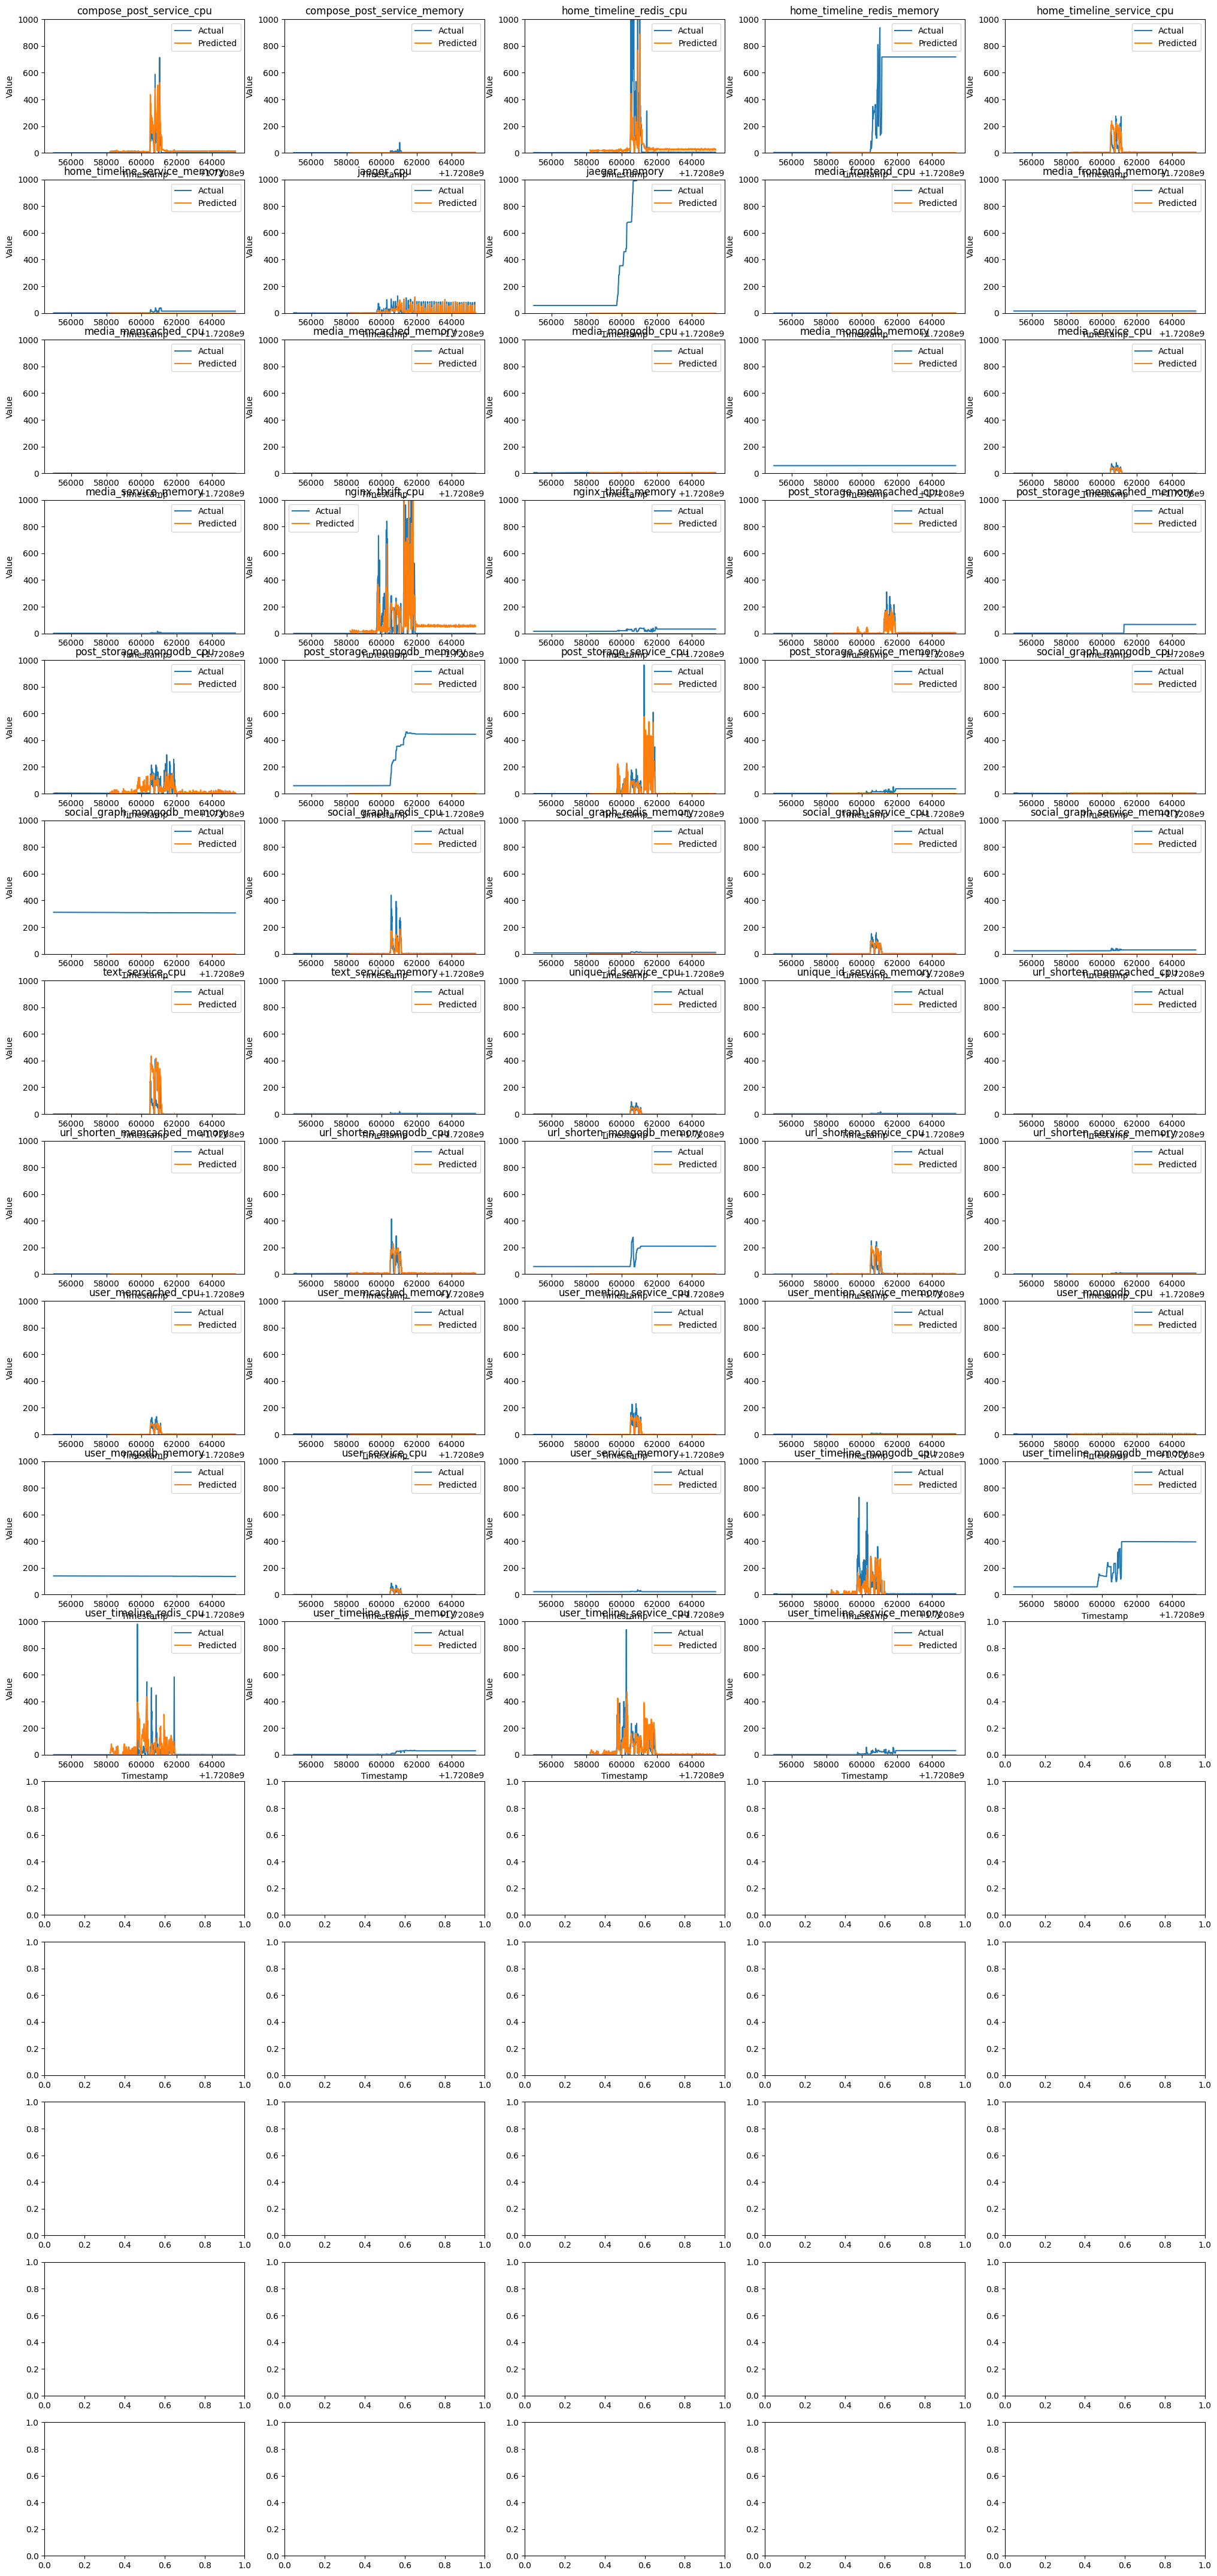

In [8]:
# Plot the data using line plot
import matplotlib.pyplot as plt
# Create 5x5 grid of subplots
fig, axes = plt.subplots(16, 5, figsize=(25, 55))
# Flatten the axes array
axes = axes.flatten()
# Plot each metric
df.drop([col for col in df.columns if col.endswith("_replicas")], axis=1, inplace=True)
for i, metric in enumerate(df.columns[1:][:-1]):
    axes[i].plot(df['timestamp'], df[metric], label='Actual')
    axes[i].plot(df_predicted['timestamp'], df_predicted[metric], label='Predicted')
    axes[i].set_title(metric)
    axes[i].set_xlabel('Timestamp')
    axes[i].set_ylabel('Value')
    # Set max y-axis limit to 1000
    axes[i].set_ylim(0, 1000)
    axes[i].legend()

In [9]:
fig.savefig(input())

In [10]:
table = "social_network_replicas"
cur = conn.cursor()
cur.execute(f"SELECT * FROM {table}")
replicas = cur.fetchall()
replicas_column_names = [desc[0] for desc in cur.description]
cur.close()

In [11]:
# Create a dataframe
replica_df = pd.DataFrame(replicas, columns=replicas_column_names)
replica_df

,id,compose_post_service,home_timeline_redis,home_timeline_service,jaeger,media_frontend,media_memcached,media_mongodb,media_service,nginx_thrift,...,url_shorten_mongodb,url_shorten_service,user_memcached,user_mention_service,user_mongodb,user_service,user_timeline_mongodb,user_timeline_redis,user_timeline_service,timestamp
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1720854971
1,2,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1720854981
2,3,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1720854991
3,4,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1720855001
4,5,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1720855011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720,721,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1720865367
721,722,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1720865377
722,723,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1720865387
723,724,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1720865397


In [12]:
i = 2
replica_df[replicas_column_names[i]]

0      1
1      1
2      1
3      1
4      1
      ..
720    1
721    1
722    1
723    1
724    1
Name: home_timeline_redis, Length: 725, dtype: int64

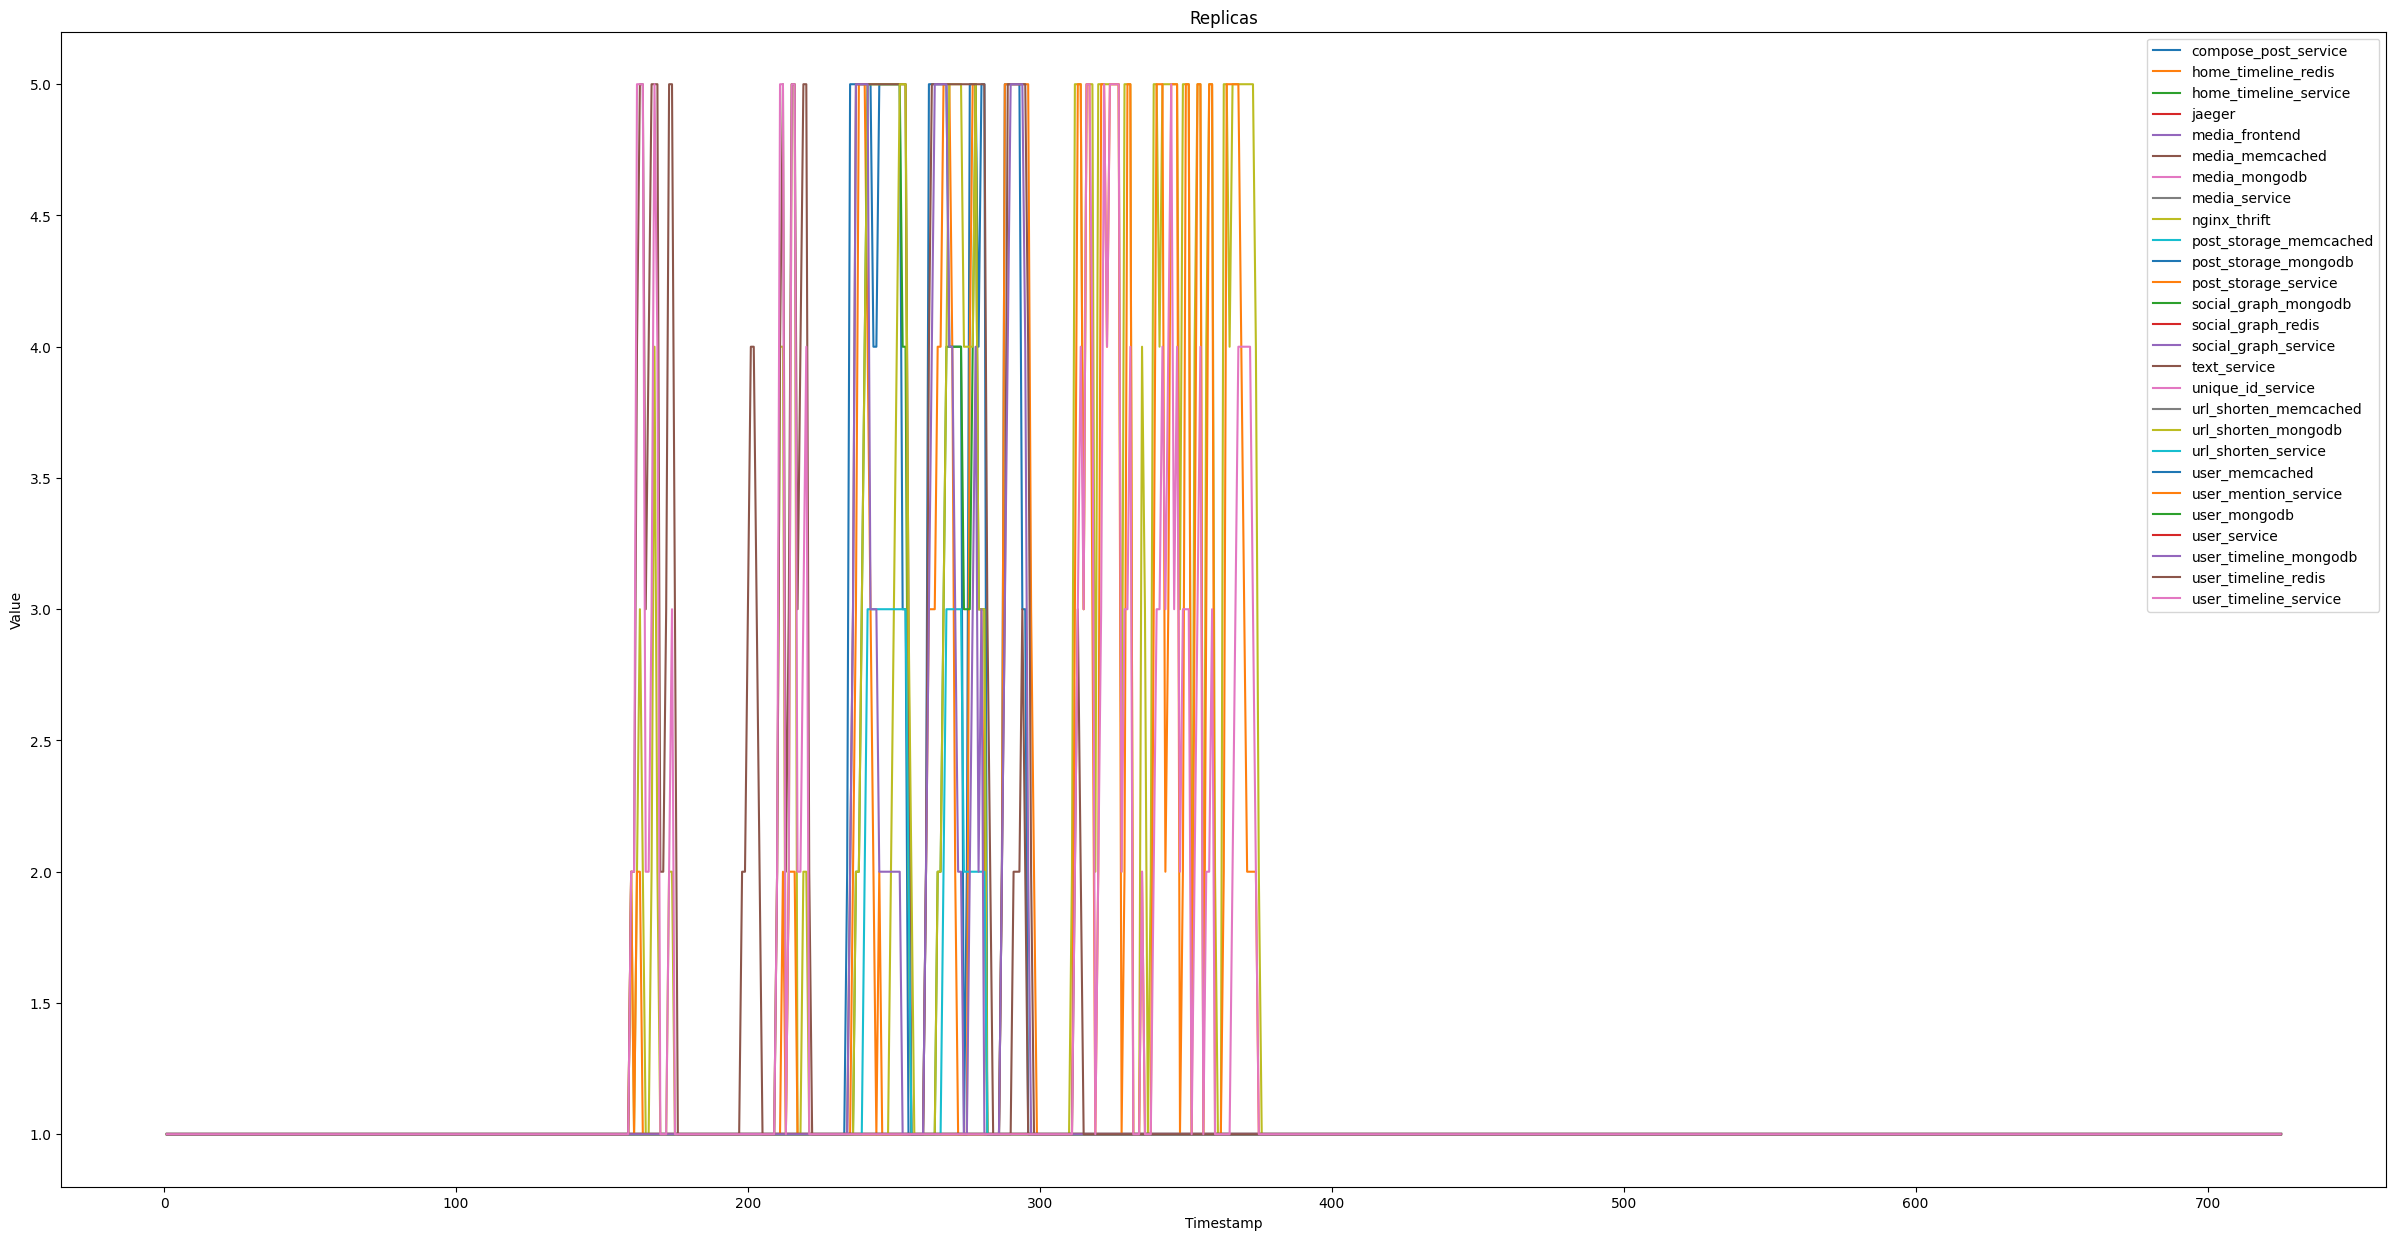

In [13]:
# Plot the data using line plot
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 15))
for replicas_column_name in replicas_column_names[1:]:
    if replicas_column_name == "timestamp":
        continue
    plt.plot(replica_df["id"], replica_df[replicas_column_name], label=replicas_column_name)
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Replicas')
plt.legend()
plt.show()


In [14]:
cur.close()